In [1]:
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (30, 15)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 22})


The marketer wants to obtain some insights from the digital marketing spend data (attached).
Specifically, the marketer would want to know:



1.	How many impressions are we obtaining monthly?
a.	Produce a line chart showing total impressions per calendar month
2.	Which are the top ten campaigns by total spend?
3.	Which network is proving us with the best (lowest) cost-per-click statistic?
4.	Which campaign is providing us with the best (lowest) cost-per-conversion statistic?
5.	Which agency is providing us with the best (lowest) cost-per-conversion statistic?
6.	On which platform are we getting the greatest number of video views and the greatest number of full video views (videos viewed until the end)


In [2]:
df = pd.read_csv('Test 2_Coding ability/20211213_coding_test_for_screening_purposes_internship_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11129 entries, 0 to 11128
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   s_agency                     11129 non-null  object 
 1   s_account_id                 11129 non-null  object 
 2   s_platform                   11129 non-null  object 
 3   s_network                    11129 non-null  object 
 4   s_campaign                   11129 non-null  object 
 5   s_source                     11129 non-null  object 
 6   s_medium                     11129 non-null  object 
 7   s_content                    11129 non-null  object 
 8   s_url_location               11129 non-null  object 
 9   d_date                       11129 non-null  object 
 10  i64_total_clicks             11129 non-null  int64  
 11  i64_total_impressions        11129 non-null  int64  
 12  i64_total_video_views        11129 non-null  int64  
 13  i64_total_video_

In [4]:
for i in df.columns:
    print(i,len(df[i].value_counts()))

s_agency 6
s_account_id 25
s_platform 2
s_network 7
s_campaign 480
s_source 14
s_medium 29
s_content 3644
s_url_location 5
d_date 569
i64_total_clicks 538
i64_total_impressions 5385
i64_total_video_views 2568
i64_total_video_views_25 2252
i64_total_video_views_50 1961
i64_total_video_views_75 1895
i64_total_video_views_100 1617
i64_total_video_impressions 5374
i64_total_conversions 279
f_total_costs 4147


## 1.	How many impressions are we obtaining monthly?
a.	Produce a line chart showing total impressions per calendar month


In [5]:

plt.rcParams['figure.figsize'] = (30, 15)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 22})

df = pd.read_csv('Test 2_Coding ability/20211213_coding_test_for_screening_purposes_internship_data.csv')

In [6]:
df['Date'] = pd.to_datetime(df['d_date'])

In [7]:
gp = df.groupby(by=[df['Date'].apply(lambda x: x.year),
               df['Date'].apply(lambda x: x.month)]).agg('i64_total_impressions').sum()
gp

Date  Date
2019  1          79201
      2         202308
      3            331
      4           6674
      5            977
      6          53641
      7           9607
      8          49023
      9         735911
      10           240
      11         21150
      12        608728
2020  1         707144
      2        1440894
      3         909637
      4        3151937
      5        2995259
      6        1483414
      7         324671
      8        1395490
      9        2383594
      10        852134
      11       4788218
      12       2494358
2021  1        5488521
      2        6884677
      3       11692610
      4       10491191
      5       11778362
      6       14746332
      7        6670838
      8        8840087
      9       10787434
      10      12301779
      11      16217144
      12       2534244
Name: i64_total_impressions, dtype: int64

In [8]:
gp = gp/1e6

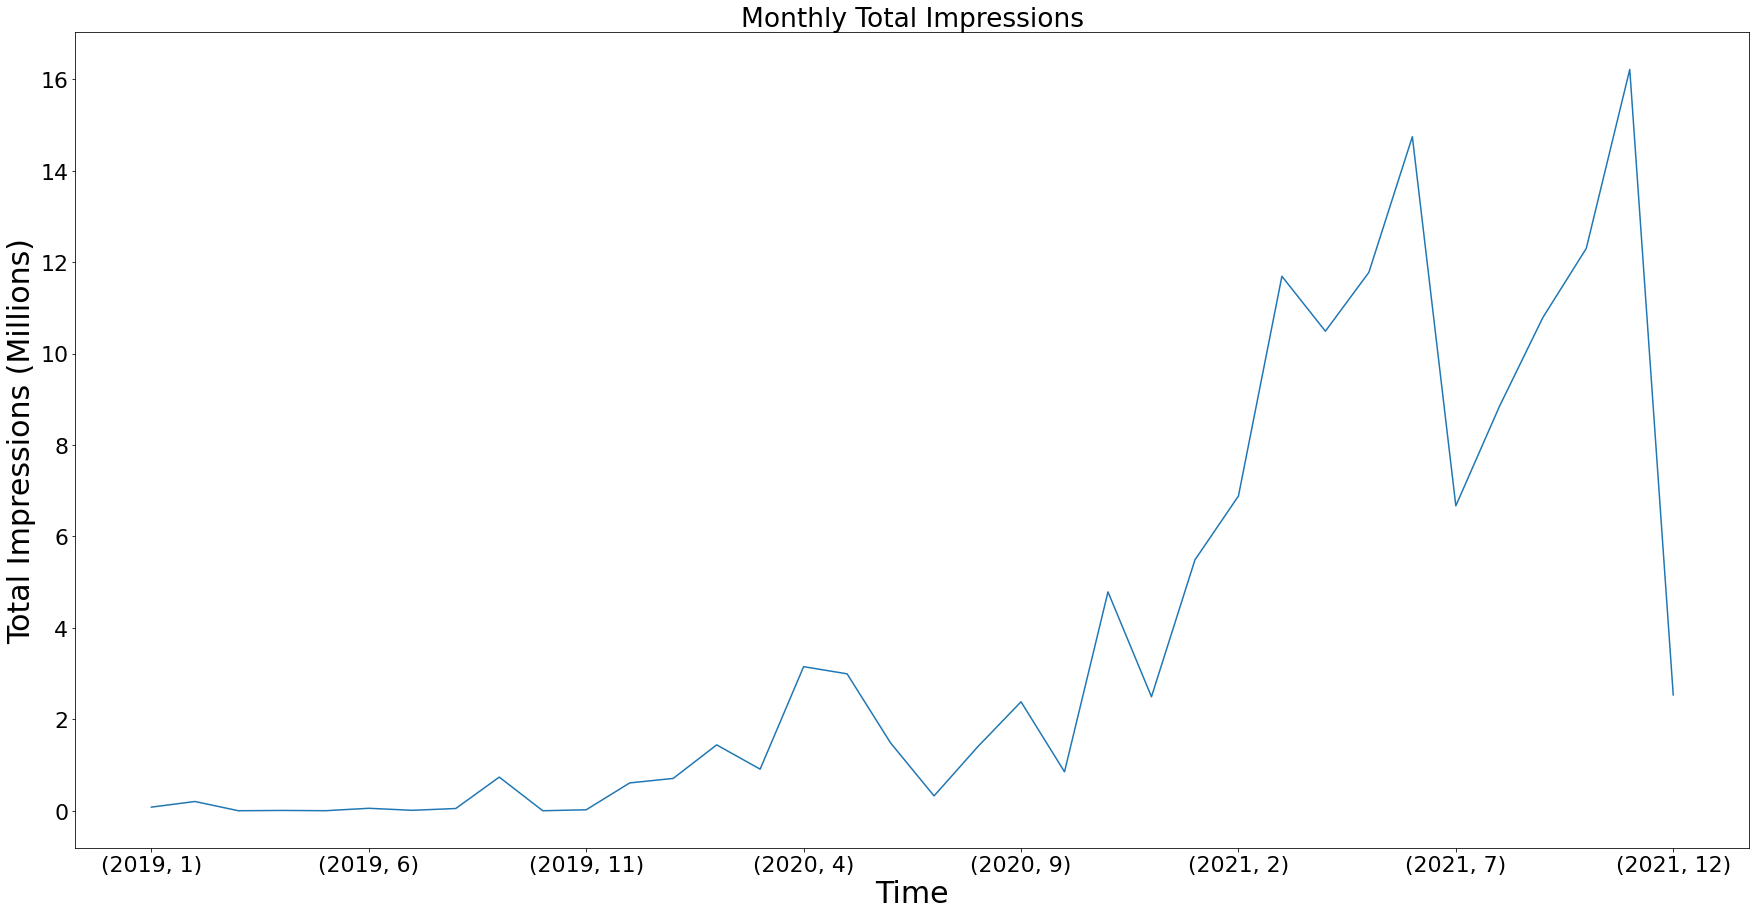

In [24]:
fig = plt.figure()
gp.plot()
plt.ylabel("Total Impressions (Millions)", fontsize=30)
plt.xlabel("Time", fontsize=30)
plt.title('Monthly Total Impressions')
plt.show()
fig.savefig('Q1.png', dpi=100)

## 2.	Which are the top ten campaigns by total spend?

In [10]:
df['s_campaign'].value_counts()

ed694daefc7ec776c4457533fd083f76ac2253627f68df0241ac76cbd5ed7def    385
18aa0904ffc179408b1960fa212e60aee06bb50e5f62eaa3cdf84b74485d931b    323
7e25e80d6f24346dd86852e047d9cf17b1a0fa48dbb9242c2f48f20ca62ecf46    316
10fedb1d8af4590016932d975083be39bc5cd58f827addb9da813b59dcfc9009    294
47161e364a788aae112a3fc40a716a9a894c7fe80a60a32739ebfb99dd3606ec    283
                                                                   ... 
d900f3e131846ba545a466ff2b2ded28aee02d6c72f963b9e72cb7fea81f0ccb      1
c75383464133350e00e312b0b8e440c3a86682ddda80db8d2eb386cc606c8b30      1
6eae7c4c54eac3b99345cf171bb0476309bba84127398f0a9223537496a0f126      1
e13613e86ccdd52dc58a1948e8e1a952df3ffb2e7643143a9f0ffd6f3fd4fc8d      1
d3fc9795245c741bc7309b1c49ee97c37b3ff3638963762eb552a92f75974c9f      1
Name: s_campaign, Length: 480, dtype: int64

In [11]:
df.groupby('s_campaign').agg('f_total_costs').sum().sort_values(ascending=False)[:10]

s_campaign
e7b32135be3719c4d894437ca98ef4c457606716e547051a76ffdcf25a03adc9    160548.00
bfa5d1ee86cee0392b12c835bd2fdafa5ac6b2b0d6bef38d799698091815e405    143574.00
54566b35bcd0657d9c07a5678fe26800a48420d0a979857223b0650552544523     41214.97
aabdcf8690ec4fdd85bb04409718b0460b9ff72061cc173ae332d79d3ca99aef     29347.06
21aadf3b106e618a352dcc84b75a2a16d3823881585cca55d9de474bb6dfd50c     23117.14
c486f9ede79bab637dcad911a59d4dfe25cd00213c258baea26292716bf7c22b     19607.00
838c57c1ecb989f22dc2c20220bb66ba3849939aae1d55b1f3686872d426253f     17730.95
613ce375b951b64d5c8d9f0fb4d8a04456a46e823cae2f4821ec5ddf8f327d43     15283.00
ed694daefc7ec776c4457533fd083f76ac2253627f68df0241ac76cbd5ed7def     13020.79
0a7a8f62967beaa342880e180e937fb1d3dec3a8d92afe572007d1dfa04e9f0b     12295.00
Name: f_total_costs, dtype: float64

## 3.	Which network is proving us with the best (lowest) cost-per-click statistic?


In [12]:
gp_network = df.groupby('s_network').sum()
gp_network['cost_per_click'] = gp_network['f_total_costs']/gp_network['i64_total_clicks']

In [13]:
gp_network['cost_per_click'].sort_values()

s_network
cedd5112f8eaaa196a28b7fb354c27326d10c109c6874b7810be684bd49cc7fc     0.094378
6ab8790581d775a407ec307a85fe235a759653a30c7e3b62e7920cf4439f28c1     1.535762
2dcaae096ced659b4f663634b245c3f5ac4e9ef36645ab47660cd75e5a4cfa33     1.998622
0d18d45bb6b1993fd838ff5b35be5d5bbd9df8fd174ab730edcfb6b8b4c78830     2.691113
f0873176a47b4c31d60bef4fd27d1f5d0c8597bf011fe4af26034886eb3b308f     3.980235
4896429016fc81c43e427c11b5d350c638515d54eb3b744c362716a44432bd4a    39.095000
d965fc71fa06ee77e9d9c69b27f8dd512b6dd2060ca506bd9fc461436d8c7350          inf
Name: cost_per_click, dtype: float64

In [14]:
gp_network['cost_per_click'].sort_values().index[0]

'cedd5112f8eaaa196a28b7fb354c27326d10c109c6874b7810be684bd49cc7fc'

In [15]:
# Depends on how you aggregate, you could calculate cost per click at individual level and then aggregate.

## 4.	Which campaign is providing us with the best (lowest) cost-per-conversion statistic?


In [16]:
gp_campaign = df.groupby('s_campaign').sum()
gp_campaign['cost-per-conversion'] = gp_campaign['f_total_costs']/gp_campaign['i64_total_conversions']


In [17]:
gp_campaign['cost-per-conversion'].sort_values().index[0]

'522ab6cdc254af10f8f270e13e882aab6c88f46f188958b957fa67c7e553e473'

## 5.	Which agency is providing us with the best (lowest) cost-per-conversion statistic?


In [18]:
def group_statistic(group,num,den,df,ascending=True):
    gp = df.groupby(group).sum()
    per_statistic = gp[num]/gp[den]
    return per_statistic.sort_values(ascending=ascending).index[0]

In [19]:
group_statistic('s_agency','f_total_costs','i64_total_conversions',df)

'172d43e40fb853e33086f64a04842c9ed4fb5d1c9de00fce0b5fd70b1c0c944e'

## 6.	On which platform are we getting the greatest number of video views and the greatest number of full video views (videos viewed until the end)

In [20]:
df['s_platform'].value_counts()

989d940479085fc0e80353f42c54f854d4fd0725ef77058d4ef637e6bfa2810b    11125
3a7d2c5571ab650345de2c8075a364ad55392ba1351c7f9d8be4009021d2019a        4
Name: s_platform, dtype: int64

In [21]:
df.groupby('s_platform').sum()[['i64_total_video_views','i64_total_video_views_100']]

,i64_total_video_views,i64_total_video_views_100
s_platform,,
3a7d2c5571ab650345de2c8075a364ad55392ba1351c7f9d8be4009021d2019a,117858,16167
989d940479085fc0e80353f42c54f854d4fd0725ef77058d4ef637e6bfa2810b,25251553,39151855


In [22]:
df.groupby('s_platform').mean()[['i64_total_video_views','i64_total_video_views_100']]

,i64_total_video_views,i64_total_video_views_100
s_platform,,
3a7d2c5571ab650345de2c8075a364ad55392ba1351c7f9d8be4009021d2019a,29464.500000,4041.750000
989d940479085fc0e80353f42c54f854d4fd0725ef77058d4ef637e6bfa2810b,2269.802517,3519.267865


In [23]:
df[df['s_platform'] == '3a7d2c5571ab650345de2c8075a364ad55392ba1351c7f9d8be4009021d2019a']

,s_agency,s_account_id,s_platform,s_network,s_campaign,s_source,s_medium,s_content,s_url_location,d_date,...,i64_total_impressions,i64_total_video_views,i64_total_video_views_25,i64_total_video_views_50,i64_total_video_views_75,i64_total_video_views_100,i64_total_video_impressions,i64_total_conversions,f_total_costs,Date
5,ac4bd8c78a31913644e57985760da6da90a93a6c75db12...,5d379e6805ec61b6206c66636cd706b585ee5e34cf2380...,3a7d2c5571ab650345de2c8075a364ad55392ba1351c7f...,cedd5112f8eaaa196a28b7fb354c27326d10c109c6874b...,4d3b75497af478c48db6509ff534218a45dcac9064c096...,045f51a378c65b76de9f8e47c2ceabb5e194cabfc604bf...,3655777b0c79e6306a8f038da483c932850f3d3b217028...,d9ccb65ea4bb2fca123278a1c8e3b595d3bd9ff7496b6f...,f9ca5b64a847ce30cd9e2fd0f95919c91918265c575c67...,15/08/2020,...,454118,28437,14570,5211,3334.0,2375,454118,0,552.0022,2020-08-15
6,ac4bd8c78a31913644e57985760da6da90a93a6c75db12...,34c38ea885dbb9cf6f760f0f17d2318458f4ca43f1310e...,3a7d2c5571ab650345de2c8075a364ad55392ba1351c7f...,cedd5112f8eaaa196a28b7fb354c27326d10c109c6874b...,2fecc29f800e0afa02a6e3bd9f8af6cffafc9964ebc367...,045f51a378c65b76de9f8e47c2ceabb5e194cabfc604bf...,3655777b0c79e6306a8f038da483c932850f3d3b217028...,4f464fe6671abca47c3c2f5d763c372886ed0d107f0239...,f9ca5b64a847ce30cd9e2fd0f95919c91918265c575c67...,08/04/2021,...,494398,39306,73416,16393,9822.0,6445,494398,0,721.3431,2021-08-04
7,ac4bd8c78a31913644e57985760da6da90a93a6c75db12...,34c38ea885dbb9cf6f760f0f17d2318458f4ca43f1310e...,3a7d2c5571ab650345de2c8075a364ad55392ba1351c7f...,cedd5112f8eaaa196a28b7fb354c27326d10c109c6874b...,2fecc29f800e0afa02a6e3bd9f8af6cffafc9964ebc367...,045f51a378c65b76de9f8e47c2ceabb5e194cabfc604bf...,3655777b0c79e6306a8f038da483c932850f3d3b217028...,4f464fe6671abca47c3c2f5d763c372886ed0d107f0239...,f9ca5b64a847ce30cd9e2fd0f95919c91918265c575c67...,09/04/2021,...,504157,38039,71706,15642,9262.0,6215,504157,0,750.0000,2021-09-04
34,ac4bd8c78a31913644e57985760da6da90a93a6c75db12...,5d379e6805ec61b6206c66636cd706b585ee5e34cf2380...,3a7d2c5571ab650345de2c8075a364ad55392ba1351c7f...,cedd5112f8eaaa196a28b7fb354c27326d10c109c6874b...,4d3b75497af478c48db6509ff534218a45dcac9064c096...,045f51a378c65b76de9f8e47c2ceabb5e194cabfc604bf...,3655777b0c79e6306a8f038da483c932850f3d3b217028...,d9ccb65ea4bb2fca123278a1c8e3b595d3bd9ff7496b6f...,f9ca5b64a847ce30cd9e2fd0f95919c91918265c575c67...,13/08/2020,...,214442,12076,6437,2437,1570.0,1132,214442,0,215.1972,2020-08-13
